# Lock-In Amplifier Principle Figures

This notebook generates the three figures for the lock-in amplifier principles section:
- **Figure 1**: Input signal Vs(t) and Reference signal Vr(t)
- **Figure 2**: Mixer output in time and frequency domain
- **Figure 3**: Block diagram of signal flow

Parameters:
- Input signal: V_s(t) = A(t)*sin(ω_s*t + θ) with **amplitude modulation**
- A(t) switches between A1 = 0.5 V and A2 = 1.5 V every 0.025 seconds
- Signal frequency: ω_s = 2π*50 Hz, Phase offset: θ = π/4
- Reference signal: V_r(t) = sin(ω_r*t) with ω_r = 2π*50 Hz

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
from scipy import signal as sp_signal

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

# Define parameters
A1 = 0.5                 # Amplitude level 1
A2 = 1.5                 # Amplitude level 2
f_s = 10                 # Signal frequency in Hz
omega_s = 2 * np.pi * f_s # Angular frequency of signal (10 Hz)
omega_r = 2 * np.pi * f_s # Angular frequency of reference (10 Hz)
theta = np.pi /2        # Phase offset (π/2 radians = 90°)
cycles_per_switch = 25   # Switch amplitude every 25 cycles (at zero-crossing)

# Time array - need at least 2 full switches to see modulation clearly
# Each switch takes 25 cycles × 0.02s = 0.5s, so 2 seconds shows 4 switches
# Extended to start at -0.5s to provide data before t=0 for FFT
t = np.linspace(-0.5, 1.5, 100000)  # -0.5 to 1.5 seconds (100k points for smooth plotting)

# Calculate period and switching time
period = (0.5)/ f_s
switch_period = cycles_per_switch * period  # Time for 25 cycles

# Create amplitude modulation that switches at zero-crossings
# Count the number of complete cycles
cycle_number = np.floor(t / period)
# Switch based on cycle count
A_t = np.where((cycle_number % (2 * cycles_per_switch)) < cycles_per_switch, A1, A2)

# Generate signals with amplitude modulation
V_s = A_t * np.sin(omega_s * t + theta)  # Amplitude modulated input signal
V_r = np.sin(omega_r * t)                 # Reference signal

print("="*70)
print("SIGNAL PARAMETERS")
print("="*70)
print(f"Amplitude level 1 (A₁):     {A1} V")
print(f"Amplitude level 2 (A₂):     {A2} V")
print(f"Cycles per switch:          {cycles_per_switch} cycles")
print(f"Switching period:           {switch_period*1000:.0f} ms")
print(f"Signal frequency (f_s):     {f_s} Hz")
print(f"Reference frequency (f_r):  {f_s} Hz")
print(f"Phase offset (θ):           π/4 radians = {np.degrees(theta):.1f}°")
print(f"Time range:                 0 to {t[-1]*1000:.0f} ms")
print("="*70)

SIGNAL PARAMETERS
Amplitude level 1 (A₁):     0.5 V
Amplitude level 2 (A₂):     1.5 V
Cycles per switch:          25 cycles
Switching period:           1250 ms
Signal frequency (f_s):     10 Hz
Reference frequency (f_r):  10 Hz
Phase offset (θ):           π/4 radians = 90.0°
Time range:                 0 to 1500 ms


## Figure 1: Input Signal V_s(t) and Reference Signal V_r(t)

Plot showing:
1. **Amplitude modulated input signal**: V_s(t) = A(t)·sin(ω_s·t + θ)
   - A(t) switches between 0.5 V and 1.5 V every 25 ms
2. **Reference signal**: V_r(t) = sin(ω_r·t)

This demonstrates how the lock-in amplifier can extract the time-varying amplitude A(t).

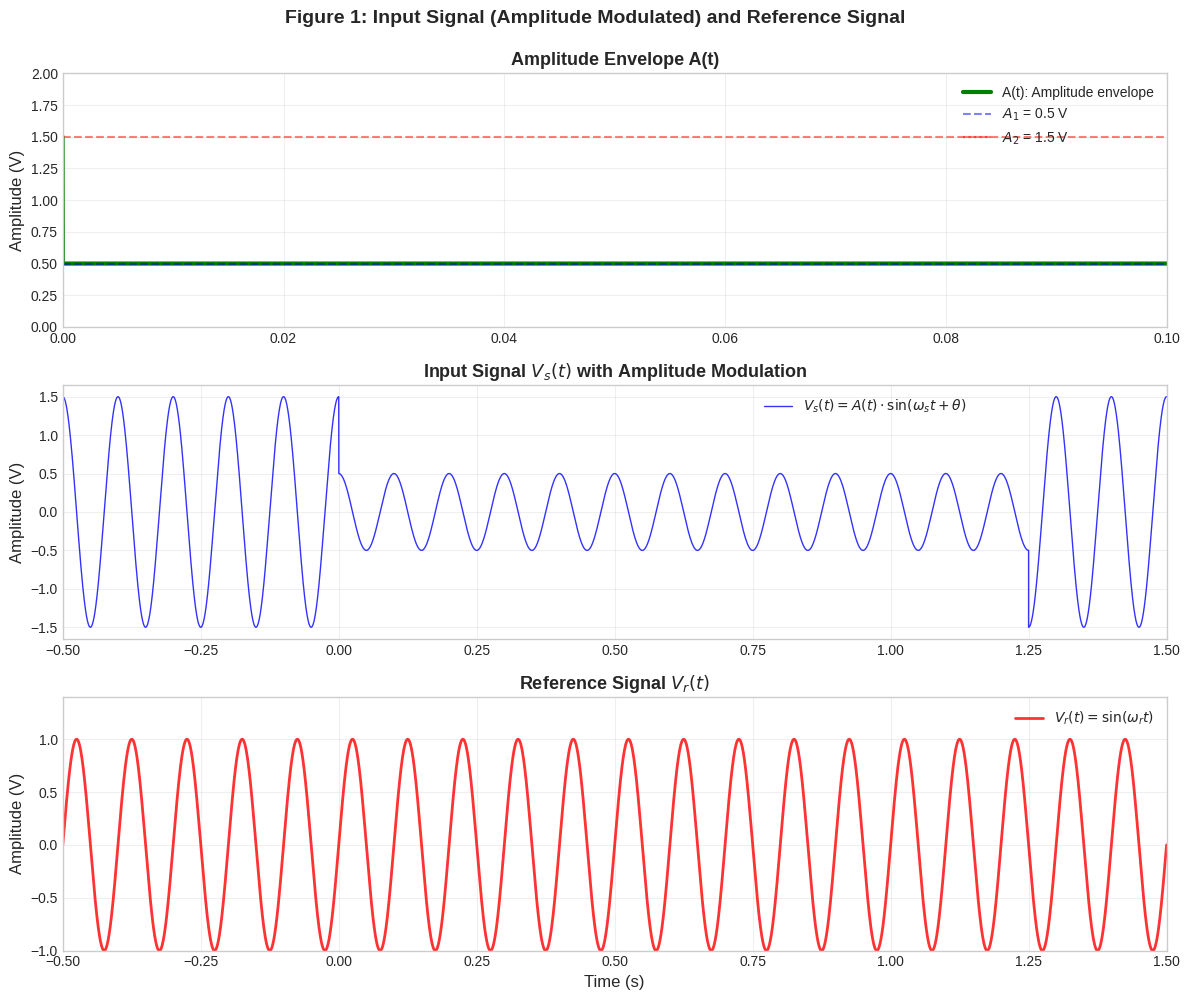

In [41]:
# Figure 1: Input and Reference signals
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Plot 1: Amplitude envelope
axes[0].plot(t, A_t, 'g-', linewidth=3, label='A(t): Amplitude envelope')
axes[0].axhline(y=A1, color='b', linestyle='--', linewidth=1.5, alpha=0.5, label=f'$A_1$ = {A1} V')
axes[0].axhline(y=A2, color='r', linestyle='--', linewidth=1.5, alpha=0.5, label=f'$A_2$ = {A2} V')
axes[0].set_ylabel('Amplitude (V)', fontsize=12)
axes[0].set_title('Amplitude Envelope A(t)', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10, loc='upper right')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim([0, 0.1])
axes[0].set_ylim([0, 2])

# Plot 2: Amplitude modulated input signal
axes[1].plot(t, V_s, 'b-', linewidth=1, label='$V_s(t) = A(t) \cdot \sin(\omega_s t + \\theta)$', alpha=0.8)
# axes[1].plot(t, A_t, 'g--', linewidth=2, label='A(t): Envelope', alpha=0.7)
# axes[1].plot(t, -A_t, 'g--', linewidth=2, alpha=0.7)
axes[1].set_ylabel('Amplitude (V)', fontsize=12)
axes[1].set_title('Input Signal $V_s(t)$ with Amplitude Modulation', fontsize=13, fontweight='bold')
# axes[1].legend(fontsize=10, loc='upper right')
axes[1].legend(fontsize=10,bbox_to_anchor=(0.83, 1), loc='upper right')
axes[1].grid(True, alpha=0.3)
# No xlim set - show full time range to see modulation
axes[1].set_xlim([-0.5, 1.5])

# Plot 3: Reference signal
axes[2].plot(t, V_r, 'r-', linewidth=2, label='$V_r(t) = \sin(\omega_r t)$', alpha=0.8)
axes[2].set_xlabel('Time (s)', fontsize=12)
axes[2].set_ylabel('Amplitude (V)', fontsize=12)
axes[2].set_title('Reference Signal $V_r(t)$', fontsize=13, fontweight='bold')
axes[2].legend(fontsize=10, loc='upper right')
axes[2].grid(True, alpha=0.3)
# No xlim set - show full time range to see modulation
axes[2].set_xlim([-0.5, 1.5])
axes[2].set_ylim([-1, 1.4])

plt.suptitle('Figure 1: Input Signal (Amplitude Modulated) and Reference Signal', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## Figure 2: Mixer Output (Time Domain and Frequency Domain)

Two-panel figure showing:
- **Panel 1**: Mixer output V_PSD(t) = V_s(t) × V_r(t) in time domain
  - Shows how the DC component varies with the amplitude modulation A(t)
- **Panel 2**: FFT magnitude spectrum showing DC, modulation frequency, and 2ω components

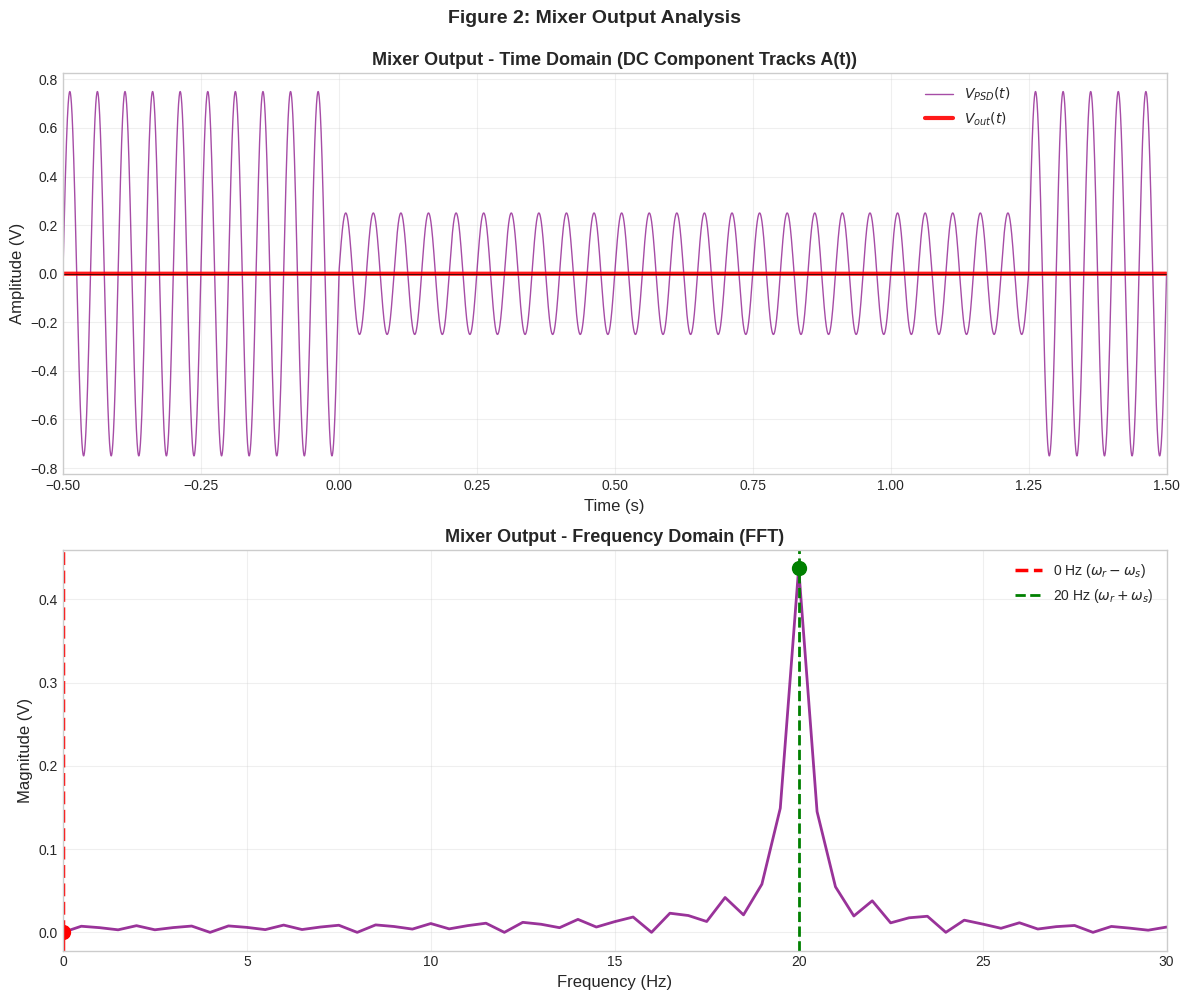

MIXER OUTPUT ANALYSIS
DC level at A₁ = 0.5:      (A₁/2)·cos(θ) = 0.0000 V
DC level at A₂ = 1.5:      (A₂/2)·cos(θ) = 0.0000 V

Frequency components in FFT:
  Modulation frequency:     0.40 Hz = 0.0074 V
  2ω component:             20 Hz = 0.4375 V

The DC component tracks the amplitude modulation A(t)!
After low-pass filtering, this varying DC extracts A(t).


In [42]:
# Calculate mixer output
V_PSD = V_s * V_r

# Calculate FFT
N = len(t)
dt = t[1] - t[0]
freq = np.fft.rfftfreq(N, dt)
V_PSD_fft = np.fft.rfft(V_PSD)
V_PSD_mag = np.abs(V_PSD_fft) / N * 2  # Normalize and scale for single-sided spectrum

# Figure 2: Mixer output in time and frequency domain
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Subplot 1: Time domain
axes[0].plot(t, V_PSD, 'purple', linewidth=1, alpha=0.7, label='$V_{PSD}(t) $')

# Calculate time-varying DC component (follows amplitude modulation)
DC_t = A_t / 2 * np.cos(theta)
axes[0].plot(t, DC_t, 'r-', linewidth=3, 
             label=r'$V_{out}(t)$', alpha=0.9)
# axes[0].fill_between(t, 0, DC_t, alpha=0.2, color='red', label='DC level (varies with A(t))')

# Show the two DC levels
DC1 = A1/2 * np.cos(theta)
DC2 = A2/2 * np.cos(theta)
# axes[0].axhline(y=DC1, color='blue', linestyle='--', linewidth=1.5, alpha=0.5, 
#                 label=f'DC at $A_1$: {DC1:.3f} V')
# axes[0].axhline(y=DC2, color='green', linestyle='--', linewidth=1.5, alpha=0.5, 
#                 label=f'DC at $A_2$: {DC2:.3f} V')

axes[0].set_xlabel('Time (s)', fontsize=12)
axes[0].set_ylabel('Amplitude (V)', fontsize=12)
axes[0].set_title('Mixer Output - Time Domain (DC Component Tracks A(t))', fontsize=13, fontweight='bold')
# axes[0].legend(fontsize=9, loc='upper right')
axes[0].legend(fontsize=10, bbox_to_anchor=(0.87, 1), loc='upper right')
axes[0].grid(True, alpha=0.3)
# No xlim set - show full time range to see modulation
axes[0].axhline(y=0, color='k', linewidth=0.5)
axes[0].set_xlim([-0.5, 1.5])

# Subplot 2: Frequency domain (FFT)
axes[1].plot(freq, V_PSD_mag, 'purple', linewidth=2, alpha=0.8)

# Mark key frequency components
# DC component at 0 Hz (ωr - ωs when ωr = ωs)
dc_idx = 0
axes[1].axvline(x=freq[dc_idx], color='red', linestyle='--', linewidth=2.5, 
                label=f'0 Hz ($\\omega_r - \\omega_s$)')
axes[1].plot(freq[dc_idx], V_PSD_mag[dc_idx], 'ro', markersize=10)

# Modulation frequency (switching rate)
mod_freq = 1 / (2 * switch_period)  # Modulation frequency from amplitude switching
mod_idx = np.argmin(np.abs(freq - mod_freq))
# axes[1].axvline(x=freq[mod_idx], color='orange', linestyle='--', linewidth=2, 
#                 label=f'Modulation ({mod_freq:.2f} Hz): {V_PSD_mag[mod_idx]:.3f} V')
# axes[1].plot(freq[mod_idx], V_PSD_mag[mod_idx], 'o', color='orange', markersize=10)

# Mark the 2ω peak (ωr + ωs = 2*f_s)
peak_2omega_freq = 2 * f_s
peak_2omega_idx = np.argmin(np.abs(freq - peak_2omega_freq))
axes[1].axvline(x=freq[peak_2omega_idx], color='green', linestyle='--', linewidth=2, 
                label=f'{peak_2omega_freq} Hz ($\\omega_r + \\omega_s$)')
axes[1].plot(freq[peak_2omega_idx], V_PSD_mag[peak_2omega_idx], 'o', color='green', markersize=10)

axes[1].set_xlabel('Frequency (Hz)', fontsize=12)
axes[1].set_ylabel('Magnitude (V)', fontsize=12)
axes[1].set_title('Mixer Output - Frequency Domain (FFT)', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=10, loc='upper right')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim([0, 30])  # Start from 0 Hz (no negative frequencies in rfft)

plt.suptitle('Figure 2: Mixer Output Analysis', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("="*70)
print("MIXER OUTPUT ANALYSIS")
print("="*70)
print(f"DC level at A₁ = {A1}:      (A₁/2)·cos(θ) = {DC1:.4f} V")
print(f"DC level at A₂ = {A2}:      (A₂/2)·cos(θ) = {DC2:.4f} V")
print()
print("Frequency components in FFT:")
print(f"  Modulation frequency:     {mod_freq:.2f} Hz = {V_PSD_mag[mod_idx]:.4f} V")
print(f"  2ω component:             {peak_2omega_freq} Hz = {V_PSD_mag[peak_2omega_idx]:.4f} V")
# print(f"  2ω component:             100 Hz = {V_PSD_mag[peak_100Hz_idx]:.4f} V")
print()
print("The DC component tracks the amplitude modulation A(t)!")
print("After low-pass filtering, this varying DC extracts A(t).")
print("="*70)

## Figure 3: Block Diagram

Simple block diagram showing the signal flow through a lock-in amplifier:
1. Input Signal V_s(t) → Mixer
2. Reference V_r(t) → Mixer
3. Mixer → Low-Pass Filter
4. Low-Pass Filter → DC Output

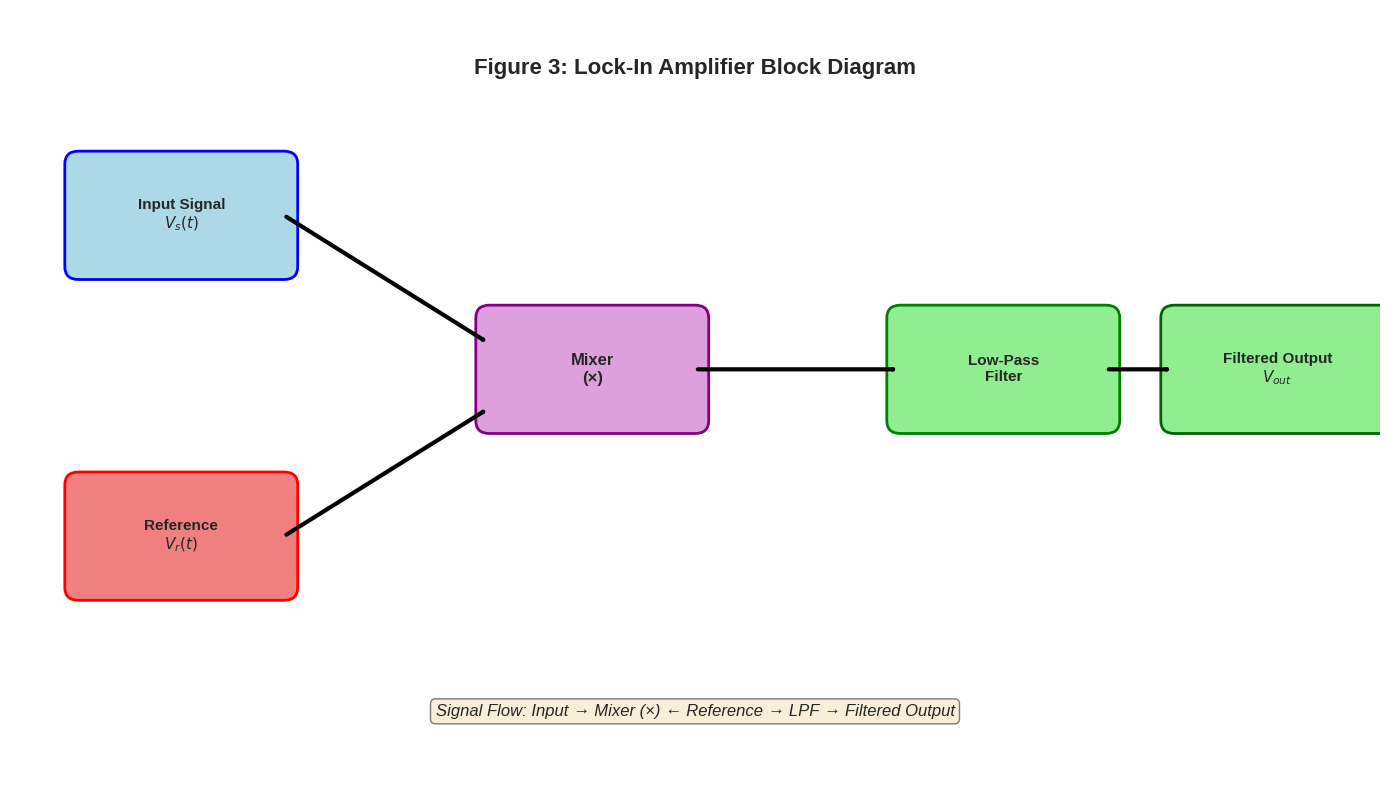

BLOCK DIAGRAM DESCRIPTION
Signal flow:
  1. Input Signal V_s(t) → Mixer
  2. Reference V_r(t) → Mixer
  3. Mixer (×) → Low-Pass Filter
  4. Low-Pass Filter → Filtered Output V_out

The mixer performs phase-sensitive detection by multiplying
the input by the reference, and the low-pass filter extracts
the low-frequency component, which is proportional to A·cos(θ).


In [43]:
# Figure 3: Block Diagram
fig, ax = plt.subplots(figsize=(14, 8))

# Turn off axis
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.axis('off')

# Define box parameters
box_width = 1.5
box_height = 0.8
arrow_props = dict(arrowstyle='->', lw=3, color='black')

# Input Signal box
input_box = FancyBboxPatch((0.5, 4), box_width, box_height, 
                           boxstyle="round,pad=0.1", 
                           edgecolor='blue', facecolor='lightblue', linewidth=2)
ax.add_patch(input_box)
ax.text(0.5 + box_width/2, 4 + box_height/2, 'Input Signal\n$V_s(t)$', 
        ha='center', va='center', fontsize=11, fontweight='bold')

# Reference Signal box
ref_box = FancyBboxPatch((0.5, 1.5), box_width, box_height, 
                         boxstyle="round,pad=0.1", 
                         edgecolor='red', facecolor='lightcoral', linewidth=2)
ax.add_patch(ref_box)
ax.text(0.5 + box_width/2, 1.5 + box_height/2, 'Reference\n$V_r(t)$', 
        ha='center', va='center', fontsize=11, fontweight='bold')

# Mixer box
mixer_box = FancyBboxPatch((3.5, 2.8), box_width, box_height, 
                           boxstyle="round,pad=0.1", 
                           edgecolor='purple', facecolor='plum', linewidth=2)
ax.add_patch(mixer_box)
ax.text(3.5 + box_width/2, 2.8 + box_height/2, 'Mixer\n(×)', 
        ha='center', va='center', fontsize=12, fontweight='bold')

# Low-Pass Filter box
lpf_box = FancyBboxPatch((6.5, 2.8), box_width, box_height, 
                         boxstyle="round,pad=0.1", 
                         edgecolor='green', facecolor='lightgreen', linewidth=2)
ax.add_patch(lpf_box)
ax.text(6.5 + box_width/2, 2.8 + box_height/2, 'Low-Pass\nFilter', 
        ha='center', va='center', fontsize=11, fontweight='bold')

# Output box
output_box = FancyBboxPatch((8.5, 2.8), box_width, box_height, 
                            boxstyle="round,pad=0.1", 
                            edgecolor='darkgreen', facecolor='lightgreen', linewidth=2)
ax.add_patch(output_box)
ax.text(8.5 + box_width/2, 2.8 + box_height/2, 'Filtered Output\n$V_{out}$', 
        ha='center', va='center', fontsize=11, fontweight='bold')

# Arrows
# Input to Mixer
arrow1 = FancyArrowPatch((2.0, 4.4), (3.5, 3.4), **arrow_props)
ax.add_patch(arrow1)

# Reference to Mixer
arrow2 = FancyArrowPatch((2.0, 1.9), (3.5, 2.9), **arrow_props)
ax.add_patch(arrow2)

# Mixer to LPF
arrow3 = FancyArrowPatch((5.0, 3.2), (6.5, 3.2), **arrow_props)
ax.add_patch(arrow3)

# LPF to Output
arrow4 = FancyArrowPatch((8.0, 3.2), (8.5, 3.2), **arrow_props)
ax.add_patch(arrow4)

# Add title
ax.text(5, 5.5, 'Figure 3: Lock-In Amplifier Block Diagram', 
        ha='center', fontsize=16, fontweight='bold')

# Add explanatory text
ax.text(5, 0.5, 'Signal Flow: Input → Mixer (×) ← Reference → LPF → Filtered Output', 
        ha='center', fontsize=12, style='italic', 
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("="*70)
print("BLOCK DIAGRAM DESCRIPTION")
print("="*70)
print("Signal flow:")
print("  1. Input Signal V_s(t) → Mixer")
print("  2. Reference V_r(t) → Mixer")
print("  3. Mixer (×) → Low-Pass Filter")
print("  4. Low-Pass Filter → Filtered Output V_out")
print()
print("The mixer performs phase-sensitive detection by multiplying")
print("the input by the reference, and the low-pass filter extracts")
print("the low-frequency component, which is proportional to A·cos(θ).")
print("="*70)

## Optional: Combined Figure (3-Panel Vertical Layout)

A comprehensive 3-panel figure showing:
1. Input signal V_s(t) and reference V_r(t)
2. Mixer output V_PSD(t) in time domain
3. FFT of V_PSD(t) showing DC and 2ω peaks

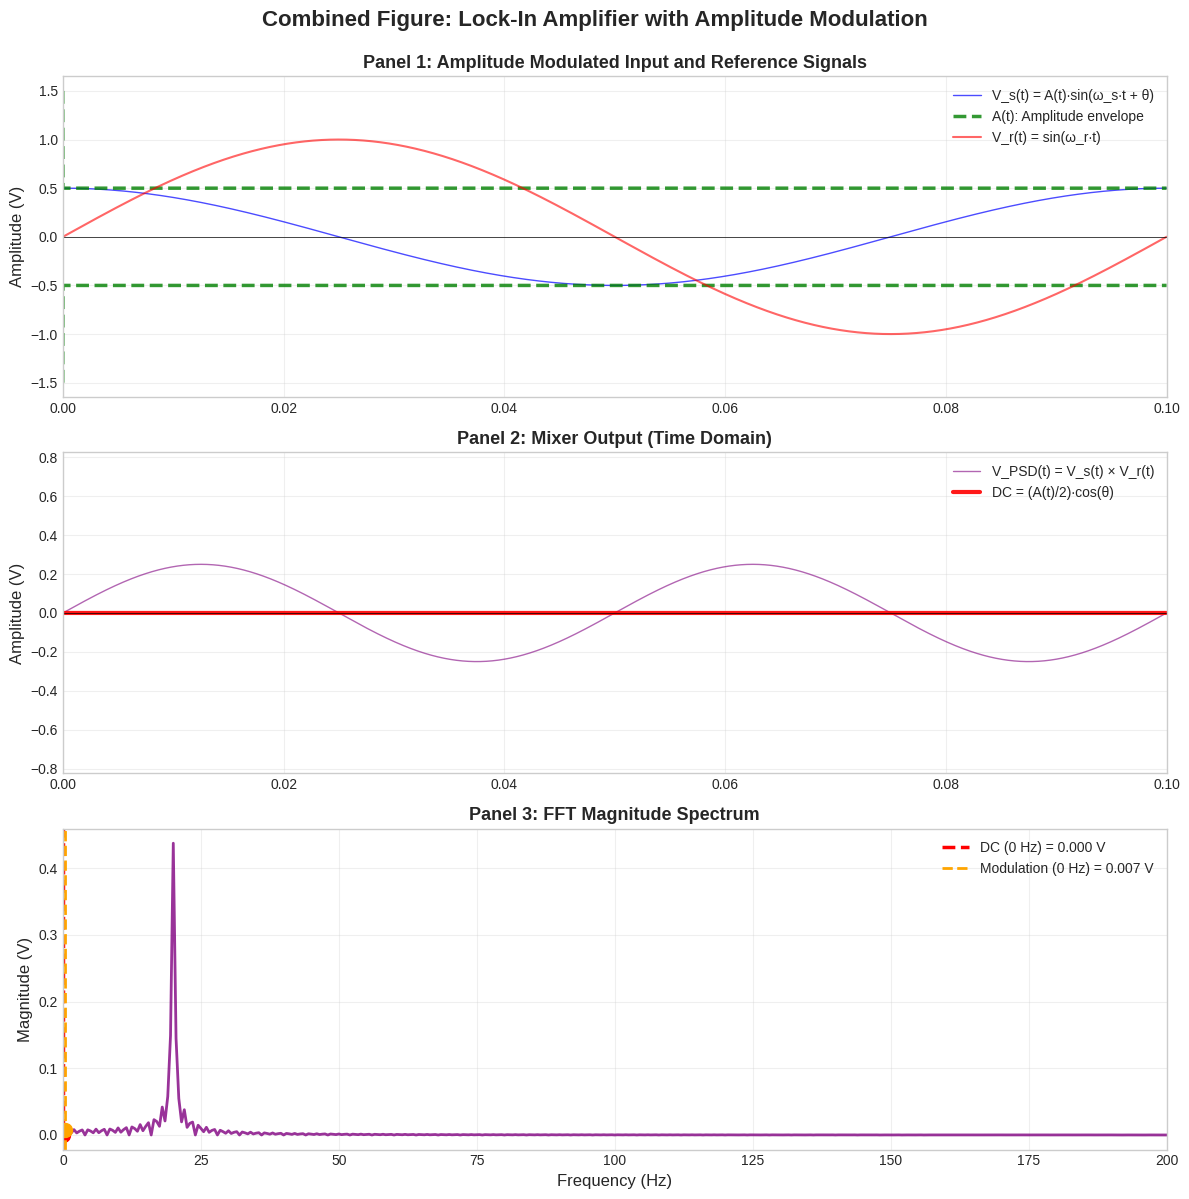

In [44]:
# Optional: Combined 3-panel figure
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Panel 1: Amplitude modulated input and reference signals
axes[0].plot(t, V_s, 'b-', linewidth=1, label='V_s(t) = A(t)·sin(ω_s·t + θ)', alpha=0.7)
axes[0].plot(t, A_t, 'g--', linewidth=2.5, label='A(t): Amplitude envelope', alpha=0.8)
axes[0].plot(t, -A_t, 'g--', linewidth=2.5, alpha=0.8)
axes[0].plot(t, V_r, 'r-', linewidth=1.5, label='V_r(t) = sin(ω_r·t)', alpha=0.6)
axes[0].set_ylabel('Amplitude (V)', fontsize=12)
axes[0].set_title('Panel 1: Amplitude Modulated Input and Reference Signals', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10, loc='upper right')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim([0, 0.1])
axes[0].axhline(y=0, color='k', linewidth=0.5)

# Panel 2: Mixer output V_PSD(t) in time domain
axes[1].plot(t, V_PSD, 'purple', linewidth=1, alpha=0.6, label='V_PSD(t) = V_s(t) × V_r(t)')
axes[1].plot(t, DC_t, 'r-', linewidth=3, label='DC = (A(t)/2)·cos(θ)', alpha=0.9)
axes[1].fill_between(t, 0, DC_t, alpha=0.2, color='red')
axes[1].set_ylabel('Amplitude (V)', fontsize=12)
axes[1].set_title('Panel 2: Mixer Output (Time Domain)', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=10, loc='upper right')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim([0, 0.1])
axes[1].axhline(y=0, color='k', linewidth=0.5)

# Panel 3: FFT of V_PSD(t)
axes[2].plot(freq, V_PSD_mag, 'purple', linewidth=2, alpha=0.8)
axes[2].axvline(x=0, color='red', linestyle='--', linewidth=2.5, 
                label=f'DC (0 Hz) = {V_PSD_mag[dc_idx]:.3f} V')
axes[2].plot(0, V_PSD_mag[dc_idx], 'ro', markersize=10)
axes[2].axvline(x=mod_freq, color='orange', linestyle='--', linewidth=2, 
                label=f'Modulation ({mod_freq:.0f} Hz) = {V_PSD_mag[mod_idx]:.3f} V')
axes[2].plot(mod_freq, V_PSD_mag[mod_idx], 'o', color='orange', markersize=10)
# axes[2].axvline(x=100, color='green', linestyle='--', linewidth=2, 
                # label=f'2ω (100 Hz) = {V_PSD_mag[peak_100Hz_idx]:.3f} V')
# axes[2].plot(100, V_PSD_mag[peak_100Hz_idx], 'o', color='green', markersize=10)
axes[2].set_xlabel('Frequency (Hz)', fontsize=12)
axes[2].set_ylabel('Magnitude (V)', fontsize=12)
axes[2].set_title('Panel 3: FFT Magnitude Spectrum', fontsize=13, fontweight='bold')
axes[2].legend(fontsize=10, loc='upper right')
axes[2].grid(True, alpha=0.3)
axes[2].set_xlim([0, 200])

plt.suptitle('Combined Figure: Lock-In Amplifier with Amplitude Modulation', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## Summary

This notebook has generated all three requested figures with **amplitude modulation**:

**Figure 1**: Shows the amplitude modulated input signal V_s(t) where A(t) switches between 0.5 V and 1.5 V every 25 ms, alongside the reference signal V_r(t) at 50 Hz. This makes it very clear that the lock-in amplifier must extract this time-varying amplitude.

**Figure 2**: Demonstrates the mixer output in both time and frequency domains:
- Time domain shows the DC component varying with A(t): switching between ~0.177 V and ~0.530 V
- Frequency domain FFT shows the modulation frequency (20 Hz) and the 2ω component (100 Hz)
- The varying DC component is what gets extracted by the low-pass filter to recover A(t)!

**Figure 3**: Block diagram illustrating the signal flow through the lock-in amplifier from input through mixer and low-pass filter to DC output.

The amplitude modulation makes it **much more obvious** that the lock-in amplifier is extracting the envelope A(t) from the high-frequency carrier, demonstrating its power for measuring time-varying signals!

---
# Dual-Phase (I/Q) Demodulation Figures

This section generates figures for the dual-phase demodulation explanation:
- **Figure 4**: Plot of V_out vs θ showing phase dependency and zero-crossing at θ=90°
- **Figure 5**: Block diagram of dual-phase mixer with I and Q branches
- **Figure 6**: Phasor diagram showing X, Y, R, and θ in the complex plane

## Figure 4: Output Voltage vs Phase (Single-Phase Problem)

This figure demonstrates the phase dependency problem in single-phase lock-in amplifiers. When θ = 90°, the output becomes zero even though a signal is present.

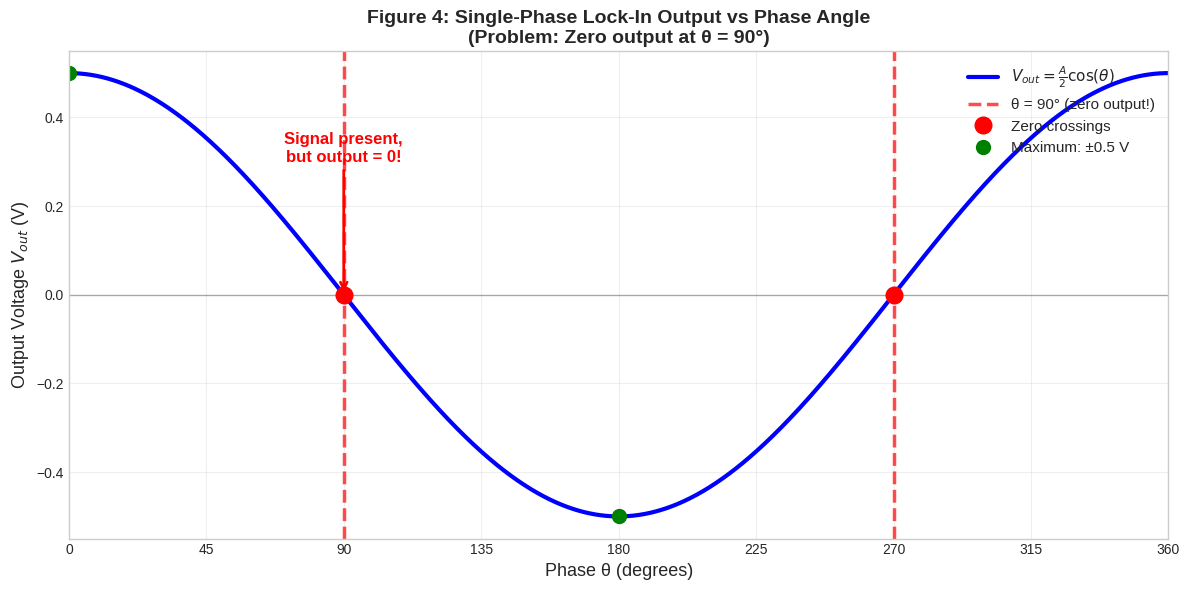

SINGLE-PHASE LOCK-IN PROBLEM
Signal amplitude A = 1.0 V
Output at θ = 0°:   V_out = 0.500 V  (maximum)
Output at θ = 90°:  V_out = 0.000 V  (ZERO!)
Output at θ = 180°: V_out = -0.500 V  (minimum)

This demonstrates the fundamental problem: if the phase happens to be
90° or 270°, the output is zero even though a signal is present!
Solution: Dual-phase (I/Q) demodulation


In [45]:
# Figure 4: Single-phase output vs phase angle
# Demonstrates the zero-crossing problem at θ = 90°

# Define parameters
A = 1.0  # Signal amplitude (1V)
theta_range = np.linspace(0, 360, 1000)  # Phase from 0 to 360 degrees
theta_rad = np.deg2rad(theta_range)

# Single-phase output: V_out = (A/2) * cos(θ)
V_out_single = (A / 2) * np.cos(theta_rad)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the output vs phase
ax.plot(theta_range, V_out_single, 'b-', linewidth=3, label='$V_{out} = \\frac{A}{2}\cos(\\theta)$')
ax.axhline(y=0, color='k', linewidth=1, linestyle='-', alpha=0.3)
ax.axvline(x=90, color='r', linewidth=2.5, linestyle='--', alpha=0.7, label='θ = 90° (zero output!)')
ax.axvline(x=270, color='r', linewidth=2.5, linestyle='--', alpha=0.7)

# Mark the zero crossings
ax.plot(90, 0, 'ro', markersize=12, label='Zero crossings')
ax.plot(270, 0, 'ro', markersize=12)

# Mark maximum points
ax.plot(0, A/2, 'go', markersize=10, label=f'Maximum: ±{A/2} V')
ax.plot(180, -A/2, 'go', markersize=10)

# Annotations
ax.annotate('Signal present,\nbut output = 0!', xy=(90, 0), xytext=(90, 0.3),
            fontsize=12, ha='center', color='red', fontweight='bold',
            arrowprops=dict(arrowstyle='->', color='red', lw=2))

ax.set_xlabel('Phase θ (degrees)', fontsize=13)
ax.set_ylabel('Output Voltage $V_{out}$ (V)', fontsize=13)
ax.set_title('Figure 4: Single-Phase Lock-In Output vs Phase Angle\n(Problem: Zero output at θ = 90°)', 
             fontsize=14, fontweight='bold')
ax.legend(fontsize=11, loc='upper right')
ax.grid(True, alpha=0.3)
ax.set_xlim([0, 360])
ax.set_xticks([0, 45, 90, 135, 180, 225, 270, 315, 360])

plt.tight_layout()
plt.show()

print("="*70)
print("SINGLE-PHASE LOCK-IN PROBLEM")
print("="*70)
print(f"Signal amplitude A = {A} V")
print(f"Output at θ = 0°:   V_out = {(A/2) * np.cos(0):.3f} V  (maximum)")
print(f"Output at θ = 90°:  V_out = {(A/2) * np.cos(np.pi/2):.3f} V  (ZERO!)")
print(f"Output at θ = 180°: V_out = {(A/2) * np.cos(np.pi):.3f} V  (minimum)")
print()
print("This demonstrates the fundamental problem: if the phase happens to be")
print("90° or 270°, the output is zero even though a signal is present!")
print("Solution: Dual-phase (I/Q) demodulation")
print("="*70)

## Figure 5: Dual-Phase (I/Q) Block Diagram

Block diagram showing the dual-phase lock-in amplifier with separate I (in-phase) and Q (quadrature) channels.

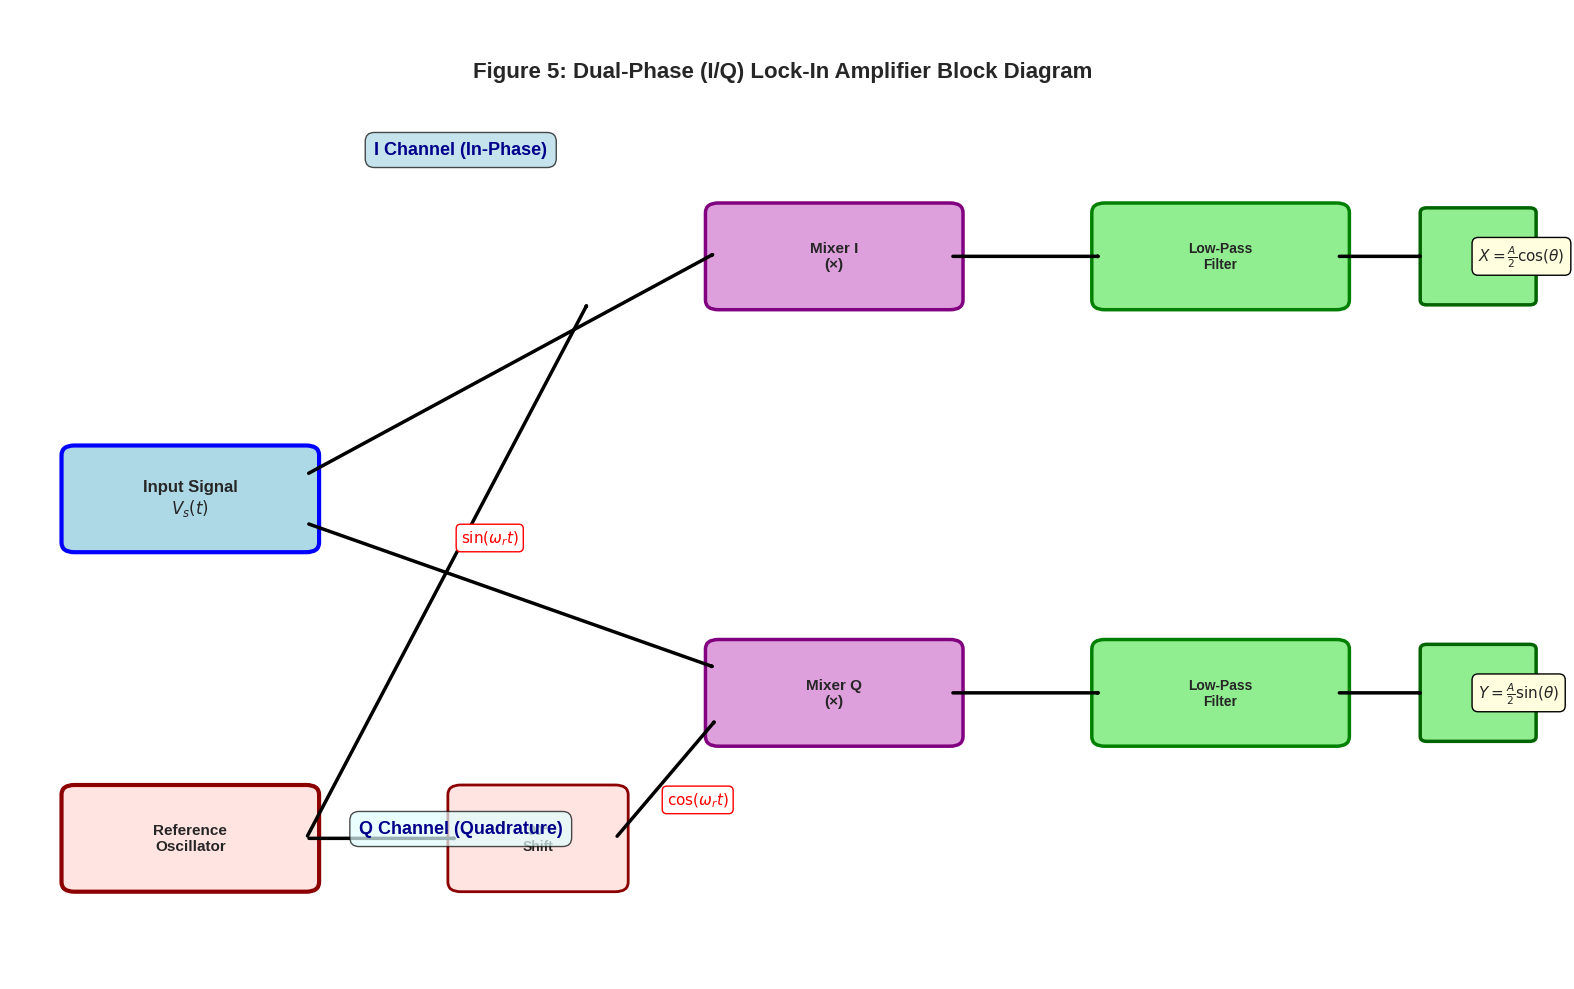

DUAL-PHASE (I/Q) LOCK-IN AMPLIFIER
Architecture:
  • Input signal V_s(t) is split to both channels
  • Reference oscillator generates sin(ωₜt)
  • 90° phase shifter creates cos(ωₜt) for Q channel

I Channel (In-Phase):
  • Mixes with sin(ωₜt)
  • Output: X = (A/2)·cos(θ)

Q Channel (Quadrature):
  • Mixes with cos(ωₜt)
  • Output: Y = (A/2)·sin(θ)

Final outputs X and Y contain complete amplitude and phase information!


In [46]:
# Figure 5: Dual-Phase (I/Q) Block Diagram
fig, ax = plt.subplots(figsize=(16, 10))

# Turn off axis
ax.set_xlim(0, 12)
ax.set_ylim(0, 10)
ax.axis('off')

# Define box parameters
box_width = 1.8
box_height = 0.9
arrow_props = dict(arrowstyle='->', lw=2.5, color='black')

# Input Signal box (shared)
input_box = FancyBboxPatch((0.5, 4.5), box_width, box_height, 
                           boxstyle="round,pad=0.1", 
                           edgecolor='blue', facecolor='lightblue', linewidth=3)
ax.add_patch(input_box)
ax.text(0.5 + box_width/2, 4.5 + box_height/2, 'Input Signal\n$V_s(t)$', 
        ha='center', va='center', fontsize=12, fontweight='bold')

# Reference oscillator box
ref_osc_box = FancyBboxPatch((0.5, 1), box_width, box_height, 
                             boxstyle="round,pad=0.1", 
                             edgecolor='darkred', facecolor='mistyrose', linewidth=3)
ax.add_patch(ref_osc_box)
ax.text(0.5 + box_width/2, 1 + box_height/2, 'Reference\nOscillator', 
        ha='center', va='center', fontsize=11, fontweight='bold')

# 90° Phase shifter
phase_shift_box = FancyBboxPatch((3.5, 1), 1.2, 0.9, 
                                 boxstyle="round,pad=0.1", 
                                 edgecolor='darkred', facecolor='mistyrose', linewidth=2)
ax.add_patch(phase_shift_box)
ax.text(3.5 + 0.6, 1 + 0.45, '90°\nShift', 
        ha='center', va='center', fontsize=10, fontweight='bold')

# === I CHANNEL (TOP) ===
# I-channel mixer
mixer_I_box = FancyBboxPatch((5.5, 7), box_width, box_height, 
                             boxstyle="round,pad=0.1", 
                             edgecolor='purple', facecolor='plum', linewidth=2.5)
ax.add_patch(mixer_I_box)
ax.text(5.5 + box_width/2, 7 + box_height/2, 'Mixer I\n(×)', 
        ha='center', va='center', fontsize=11, fontweight='bold')

# I-channel LPF
lpf_I_box = FancyBboxPatch((8.5, 7), box_width, box_height, 
                           boxstyle="round,pad=0.1", 
                           edgecolor='green', facecolor='lightgreen', linewidth=2.5)
ax.add_patch(lpf_I_box)
ax.text(8.5 + box_width/2, 7 + box_height/2, 'Low-Pass\nFilter', 
        ha='center', va='center', fontsize=10, fontweight='bold')

# I-channel output
output_I_box = FancyBboxPatch((11, 7), 0.8, 0.9, 
                              boxstyle="round,pad=0.05", 
                              edgecolor='darkgreen', facecolor='lightgreen', linewidth=2.5)
ax.add_patch(output_I_box)
ax.text(11 + 0.4, 7 + 0.45, 'X', 
        ha='center', va='center', fontsize=13, fontweight='bold')

# === Q CHANNEL (BOTTOM) ===
# Q-channel mixer
mixer_Q_box = FancyBboxPatch((5.5, 2.5), box_width, box_height, 
                             boxstyle="round,pad=0.1", 
                             edgecolor='purple', facecolor='plum', linewidth=2.5)
ax.add_patch(mixer_Q_box)
ax.text(5.5 + box_width/2, 2.5 + box_height/2, 'Mixer Q\n(×)', 
        ha='center', va='center', fontsize=11, fontweight='bold')

# Q-channel LPF
lpf_Q_box = FancyBboxPatch((8.5, 2.5), box_width, box_height, 
                           boxstyle="round,pad=0.1", 
                           edgecolor='green', facecolor='lightgreen', linewidth=2.5)
ax.add_patch(lpf_Q_box)
ax.text(8.5 + box_width/2, 2.5 + box_height/2, 'Low-Pass\nFilter', 
        ha='center', va='center', fontsize=10, fontweight='bold')

# Q-channel output
output_Q_box = FancyBboxPatch((11, 2.5), 0.8, 0.9, 
                              boxstyle="round,pad=0.05", 
                              edgecolor='darkgreen', facecolor='lightgreen', linewidth=2.5)
ax.add_patch(output_Q_box)
ax.text(11 + 0.4, 2.5 + 0.45, 'Y', 
        ha='center', va='center', fontsize=13, fontweight='bold')

# === ARROWS ===
# Input to both mixers
arrow1 = FancyArrowPatch((2.3, 5.2), (5.5, 7.5), **arrow_props)
ax.add_patch(arrow1)
arrow2 = FancyArrowPatch((2.3, 4.7), (5.5, 3.2), **arrow_props)
ax.add_patch(arrow2)

# Reference to I mixer (direct)
arrow3 = FancyArrowPatch((2.3, 1.45), (4.5, 7.0), **arrow_props)
ax.add_patch(arrow3)
ax.text(3.5, 4.5, '$\\sin(\\omega_r t)$', fontsize=11, color='red', fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='red'))

# Reference to phase shifter
arrow4 = FancyArrowPatch((2.3, 1.45), (3.5, 1.45), **arrow_props)
ax.add_patch(arrow4)

# Phase shifter to Q mixer
arrow5 = FancyArrowPatch((4.7, 1.45), (5.5, 2.7), **arrow_props)
ax.add_patch(arrow5)
ax.text(5.1, 1.8, '$\\cos(\\omega_r t)$', fontsize=11, color='red', fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='red'))

# I channel flow
arrow6 = FancyArrowPatch((7.3, 7.45), (8.5, 7.45), **arrow_props)
ax.add_patch(arrow6)
arrow7 = FancyArrowPatch((10.3, 7.45), (11, 7.45), **arrow_props)
ax.add_patch(arrow7)

# Q channel flow
arrow8 = FancyArrowPatch((7.3, 2.95), (8.5, 2.95), **arrow_props)
ax.add_patch(arrow8)
arrow9 = FancyArrowPatch((10.3, 2.95), (11, 2.95), **arrow_props)
ax.add_patch(arrow9)

# Channel labels
ax.text(3.5, 8.5, 'I Channel (In-Phase)', fontsize=13, fontweight='bold', 
        color='darkblue', ha='center',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.7))
ax.text(3.5, 1.5, 'Q Channel (Quadrature)', fontsize=13, fontweight='bold', 
        color='darkblue', ha='center',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcyan', alpha=0.7))

# Add title
ax.text(6, 9.3, 'Figure 5: Dual-Phase (I/Q) Lock-In Amplifier Block Diagram', 
        ha='center', fontsize=16, fontweight='bold')

# Add output formulas
ax.text(11.4, 7.45, '$X = \\frac{A}{2}\\cos(\\theta)$', fontsize=11, ha='left', va='center',
        bbox=dict(boxstyle='round,pad=0.4', facecolor='lightyellow'))
ax.text(11.4, 2.95, '$Y = \\frac{A}{2}\\sin(\\theta)$', fontsize=11, ha='left', va='center',
        bbox=dict(boxstyle='round,pad=0.4', facecolor='lightyellow'))

plt.tight_layout()
plt.show()

print("="*70)
print("DUAL-PHASE (I/Q) LOCK-IN AMPLIFIER")
print("="*70)
print("Architecture:")
print("  • Input signal V_s(t) is split to both channels")
print("  • Reference oscillator generates sin(ωₜt)")
print("  • 90° phase shifter creates cos(ωₜt) for Q channel")
print()
print("I Channel (In-Phase):")
print("  • Mixes with sin(ωₜt)")
print("  • Output: X = (A/2)·cos(θ)")
print()
print("Q Channel (Quadrature):")
print("  • Mixes with cos(ωₜt)")
print("  • Output: Y = (A/2)·sin(θ)")
print()
print("Final outputs X and Y contain complete amplitude and phase information!")
print("="*70)

## Figure 6: Phasor Diagram (Complex Plane)

Phasor diagram showing how X and Y components combine to give amplitude R and phase θ, independent of the phase angle.

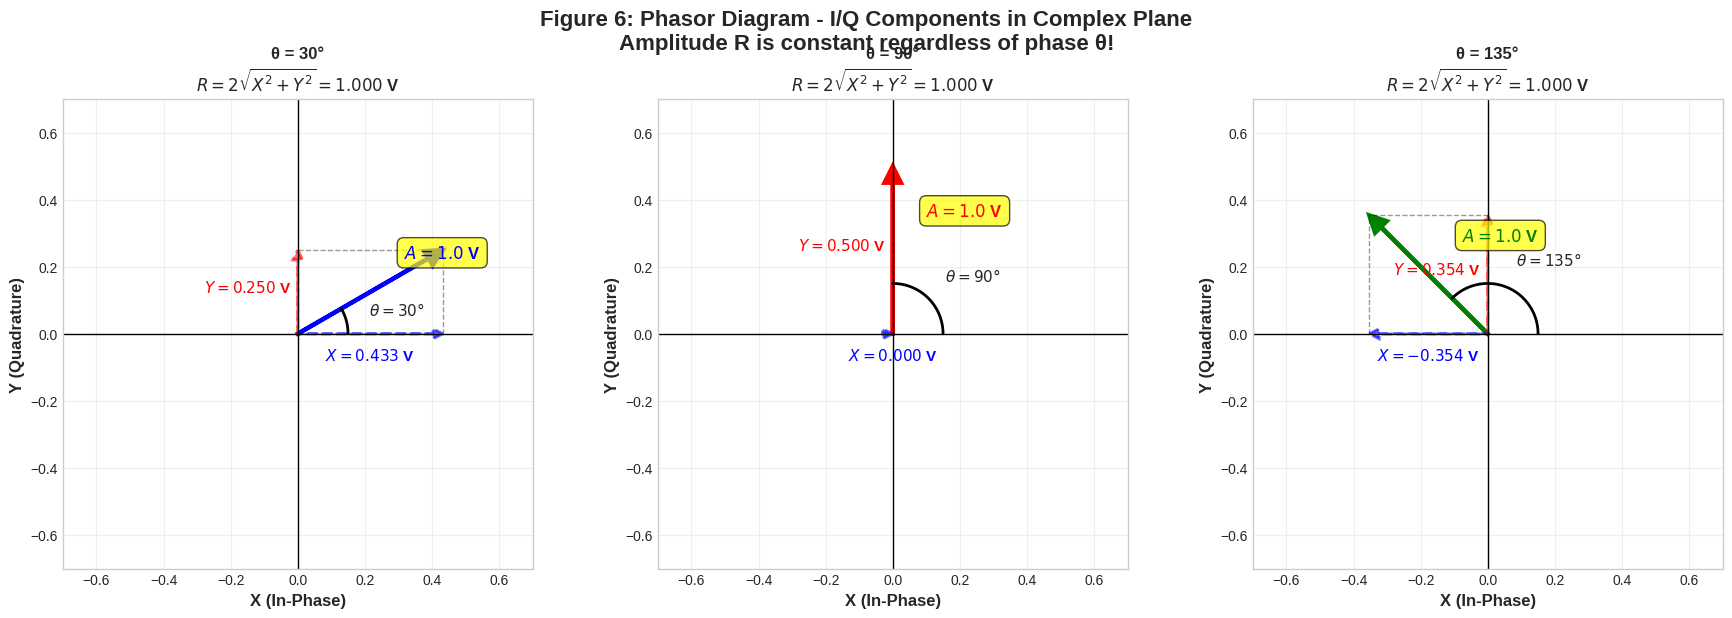

PHASOR DIAGRAM ANALYSIS
Signal amplitude A = 1.0 V (constant for all cases)

θ = 30°:
  X = (A/2)·cos(θ) = 0.4330 V
  Y = (A/2)·sin(θ) = 0.2500 V
  R = 2·√(X² + Y²) = 1.0000 V  ← Always equals A!

θ = 90°:
  X = (A/2)·cos(θ) = 0.0000 V
  Y = (A/2)·sin(θ) = 0.5000 V
  R = 2·√(X² + Y²) = 1.0000 V  ← Always equals A!

θ = 135°:
  X = (A/2)·cos(θ) = -0.3536 V
  Y = (A/2)·sin(θ) = 0.3536 V
  R = 2·√(X² + Y²) = 1.0000 V  ← Always equals A!

Key insight: Regardless of phase θ, the calculated amplitude R always
equals the true signal amplitude A. This is the power of I/Q demodulation!


In [47]:
# Figure 6: Phasor Diagram in Complex Plane
# Show multiple examples with different phase angles

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define amplitude
A = 1.0

# Three different phase angles to demonstrate
phases = [30, 90, 135]  # degrees
phase_colors = ['blue', 'red', 'green']

for idx, (theta_deg, color) in enumerate(zip(phases, phase_colors)):
    ax = axes[idx]
    theta_rad = np.deg2rad(theta_deg)
    
    # Calculate X and Y components
    X = (A / 2) * np.cos(theta_rad)
    Y = (A / 2) * np.sin(theta_rad)
    R = 2 * np.sqrt(X**2 + Y**2)  # Should equal A
    
    # Set up the plot
    ax.set_xlim([-0.7, 0.7])
    ax.set_ylim([-0.7, 0.7])
    ax.set_aspect('equal')
    ax.axhline(y=0, color='k', linewidth=1)
    ax.axvline(x=0, color='k', linewidth=1)
    ax.grid(True, alpha=0.3)
    
    # Draw the phasor (resultant vector R)
    ax.arrow(0, 0, X, Y, head_width=0.05, head_length=0.05, 
             fc=color, ec=color, linewidth=3, length_includes_head=True,
             label=f'$R = {R:.3f}$ V')
    
    # Draw X component (horizontal)
    ax.arrow(0, 0, X, 0, head_width=0.03, head_length=0.03, 
             fc='blue', ec='blue', linewidth=2, alpha=0.6,
             length_includes_head=True, linestyle='--')
    ax.text(X/2, -0.08, f'$X = {X:.3f}$ V', ha='center', fontsize=11, color='blue', fontweight='bold')
    
    # Draw Y component (vertical)
    ax.arrow(0, 0, 0, Y, head_width=0.03, head_length=0.03, 
             fc='red', ec='red', linewidth=2, alpha=0.6,
             length_includes_head=True, linestyle='--')
    ax.text(-0.15, Y/2, f'$Y = {Y:.3f}$ V', ha='center', fontsize=11, color='red', fontweight='bold')
    
    # Draw dotted lines to complete the right triangle
    ax.plot([X, X], [0, Y], 'k--', linewidth=1, alpha=0.4)
    ax.plot([0, X], [Y, Y], 'k--', linewidth=1, alpha=0.4)
    
    # Draw the angle arc
    angle_arc = np.linspace(0, theta_rad, 50)
    arc_radius = 0.15
    ax.plot(arc_radius * np.cos(angle_arc), arc_radius * np.sin(angle_arc), 
            'k-', linewidth=2)
    ax.text(0.22 * np.cos(theta_rad/2), 0.22 * np.sin(theta_rad/2), 
            f'$\\theta = {theta_deg}°$', fontsize=11, fontweight='bold')
    
    # Add labels
    ax.set_xlabel('X (In-Phase)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Y (Quadrature)', fontsize=12, fontweight='bold')
    ax.set_title(f'θ = {theta_deg}°\n$R = 2\\sqrt{{X^2 + Y^2}} = {R:.3f}$ V', 
                 fontsize=12, fontweight='bold')
    
    # Add amplitude annotation
    mid_x, mid_y = X/2, Y/2
    ax.text(mid_x + 0.1, mid_y + 0.1, f'$A = {A}$ V', 
            fontsize=12, color=color, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='yellow', alpha=0.7))

fig.suptitle('Figure 6: Phasor Diagram - I/Q Components in Complex Plane\n' + 
             'Amplitude R is constant regardless of phase θ!', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("="*70)
print("PHASOR DIAGRAM ANALYSIS")
print("="*70)
print(f"Signal amplitude A = {A} V (constant for all cases)")
print()
for theta_deg in phases:
    theta_rad = np.deg2rad(theta_deg)
    X = (A / 2) * np.cos(theta_rad)
    Y = (A / 2) * np.sin(theta_rad)
    R = 2 * np.sqrt(X**2 + Y**2)
    print(f"θ = {theta_deg}°:")
    print(f"  X = (A/2)·cos(θ) = {X:.4f} V")
    print(f"  Y = (A/2)·sin(θ) = {Y:.4f} V")
    print(f"  R = 2·√(X² + Y²) = {R:.4f} V  ← Always equals A!")
    print()

print("Key insight: Regardless of phase θ, the calculated amplitude R always")
print("equals the true signal amplitude A. This is the power of I/Q demodulation!")
print("="*70)

---
# FIR Filter Performance Analysis

Analysis of FIR filter performance showing the trade-off between ripple reduction and settling time as the number of taps increases.

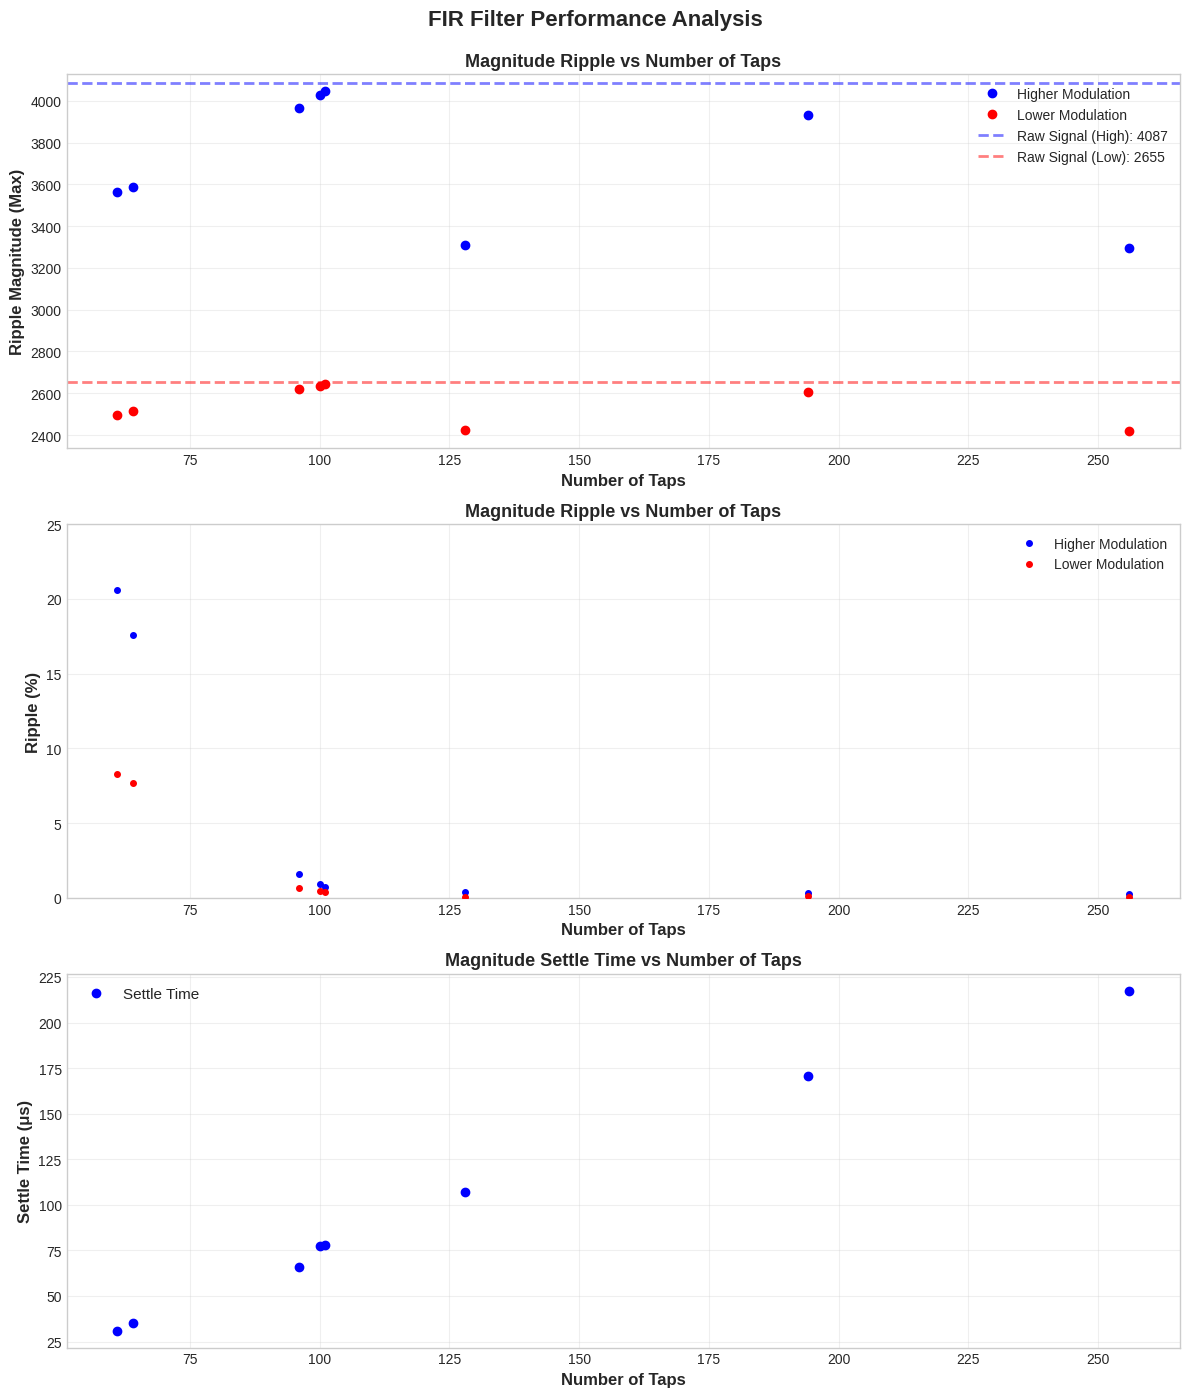

FIR FILTER PERFORMANCE - MATHEMATICAL RELATIONSHIPS

SETTLE TIME (Linear Fit):
  Equation: T_settle = 0.9668 × N_taps + -23.0411
  Simplified: T_settle ≈ 0.97 × N_taps -23.0 μs
  R² = 0.993199  (excellent fit!)

RIPPLE % (Logarithmic Fit):
  Equation: Ripple = 313.1515 / ln(N_taps) + -61.7530
  Simplified: Ripple ≈ 313.2 / ln(N_taps) -61.75 %
  R² = 0.644906

RIPPLE % (Power Law Fit):
  Equation: Ripple = 131031996765.3552 × N_taps^(-5.4819)
  Simplified: Ripple ≈ 1.31e+11 × N_taps^-5.48 %
  R² = 0.994773

  → Power law provides better fit (R² = 0.994773)

FIR FILTER RESULTS SUMMARY
Tap range tested: 61 - 256

Raw Signal Amplitudes (unfiltered):
  Higher modulation: 4087
  Lower modulation:  2655

Ripple (after filtering):
  Higher modulation: 0.002430 - 0.206128
  Lower modulation:  0.000826 - 0.082534

  Higher modulation: 0.2430% - 20.61%
  Lower modulation:  0.0826% - 8.25%
  Lower:  3213878x reduction (best case with 256 taps)

Settle Time (μs):
  Higher modulation: 31.0 - 217.5
 

In [ ]:
# FIR Filter Performance Data Analysis
import numpy as np
import matplotlib.pyplot as plt

# Parse the experimental data
taps = []
ripple_high = []
ripple_low = []
settle_high = []
settle_low = []

data_lines = """
61	2898	3564	0.2061281337	4179	4210	31
61	2300	2498	0.08253438933	4179	4210	31
64	3010	3590	0.1757575758	2165	2200	35
64	2328	2514	0.07682775713	2165	2200	35
96	3900	3964	0.01627670397	4187	4253	66
96	2600	2618	0.006899195094	4187	4253	66
100	3994	4030	0.008973080758	4188	4265.5	77.5
100	2624	2636	0.004562737643	4188	4265.5	77.5
101	4016	4046	0.007442322004	4188	4266	78
101	2632	2642	0.003792188093	4188	4266	78
128	3298	3310	0.003631961259	4207	4314	107
128	2420	2422	0.0008261049153	4207	4314	107
194	3920	3932	0.003056546103	4236	4406.5	170.5
194	2604	2608	0.001534919417	4236	4406.5	170.5
256	3288	3296	0.002430133657	4282	4499.5	217.5
256	2416	2418	0.0008274720728	4282	4499.5	217.5
"""

lines = [line.strip().split('\t') for line in data_lines.strip().split('\n')]

for i in range(0, len(lines), 2):
    tap = int(lines[i][0])
    taps.append(tap)
    ripple_high.append(float(lines[i][3]))
    ripple_low.append(float(lines[i+1][3]))
    settle_high.append(float(lines[i][6]))
    settle_low.append(float(lines[i+1][6]))

# Convert to arrays
taps = np.array(taps)
ripple_high = np.array(ripple_high)
ripple_low = np.array(ripple_low)
settle_high = np.array(settle_high)
settle_low = np.array(settle_low)

# Raw signal amplitudes (unfiltered)
raw_high = 4087
raw_low = 2655

# Extract max ripple values from the data
ripple_max_high = []
ripple_max_low = []

for i in range(0, len(lines), 2):
    ripple_max_high.append(int(lines[i][2]))  # Column 2: max value for higher modulation
    ripple_max_low.append(int(lines[i+1][2]))  # Column 2: max value for lower modulation

ripple_max_high = np.array(ripple_max_high)
ripple_max_low = np.array(ripple_max_low)

# Create figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 14))

# Plot 1: Ripple Magnitude (Max) vs Taps
ax1.plot(taps, ripple_max_high, 'bo', markersize=6, label='Higher Modulation', zorder=3)
ax1.plot(taps, ripple_max_low, 'ro', markersize=6, label='Lower Modulation', zorder=3)

# Add reference lines for unfiltered raw signals
ax1.axhline(y=raw_high, color='blue', linestyle='--', linewidth=2, alpha=0.5, 
            label=f'Raw Signal (High): {raw_high}')
ax1.axhline(y=raw_low, color='red', linestyle='--', linewidth=2, alpha=0.5, 
            label=f'Raw Signal (Low): {raw_low}')

ax1.set_xlabel('Number of Taps', fontsize=12, fontweight='bold')
ax1.set_ylabel('Ripple Magnitude (a.u.)', fontsize=12, fontweight='bold')
ax1.set_title('Magnitude Ripple vs Number of Taps', 
              fontsize=13, fontweight='bold')
ax1.legend(fontsize=10, loc='upper right')
ax1.grid(True, alpha=0.3)

# Plot 2: Ripple % vs Taps
ripple_high_pct = ripple_high * 100
ripple_low_pct = ripple_low * 100

ax2.plot(taps, ripple_high_pct, 'bo', markersize=4, label='Higher Modulation', zorder=3)
ax2.plot(taps, ripple_low_pct, 'ro', markersize=4, label='Lower Modulation', zorder=3)

ax2.set_xlabel('Number of Taps', fontsize=12, fontweight='bold')
ax2.set_ylabel('Ripple (%)', fontsize=12, fontweight='bold')
ax2.set_title('Magnitude Ripple vs Number of Taps', 
              fontsize=13, fontweight='bold')
ax2.legend(fontsize=10, loc='upper right')
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 25])

# Plot 3: Settle Time vs Taps
ax3.plot(taps, settle_high, 'bo', markersize=6, label='Settle Time')
ax3.set_xlabel('Number of Taps', fontsize=12, fontweight='bold')
ax3.set_ylabel('Settle Time (μs)', fontsize=12, fontweight='bold')
ax3.set_title('Magnitude Settle Time vs Number of Taps', fontsize=13, fontweight='bold')
# ax3.legend(fontsize=11)
ax3.grid(True, alpha=0.3)

plt.suptitle('FIR Filter Performance Analysis', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# === Curve Fitting Analysis ===
from scipy.optimize import curve_fit

# Linear fit for settle time: T_settle = a * N_taps + b
def linear_func(x, a, b):
    return a * x + b

# Logarithmic fit for ripple: Ripple = a / log(N_taps) + b
def log_func(x, a, b):
    return a / np.log(x) + b

# Power law fit for ripple: Ripple = a * N_taps^b
def power_func(x, a, b):
    return a * x**b

# Fit settle time (linear)
params_settle, _ = curve_fit(linear_func, taps, settle_high)
a_settle, b_settle = params_settle

# Fit ripple (logarithmic and power law - compare both)
params_ripple_log, _ = curve_fit(log_func, taps, ripple_high_pct)
a_ripple_log, b_ripple_log = params_ripple_log

params_ripple_power, _ = curve_fit(power_func, taps, ripple_high_pct)
a_ripple_power, b_ripple_power = params_ripple_power

# Calculate R² values to compare fits
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

settle_pred = linear_func(taps, a_settle, b_settle)
ripple_log_pred = log_func(taps, a_ripple_log, b_ripple_log)
ripple_power_pred = power_func(taps, a_ripple_power, b_ripple_power)

r2_settle = r_squared(settle_high, settle_pred)
r2_ripple_log = r_squared(ripple_high_pct, ripple_log_pred)
r2_ripple_power = r_squared(ripple_high_pct, ripple_power_pred)

print("="*70)
print("FIR FILTER PERFORMANCE - MATHEMATICAL RELATIONSHIPS")
print("="*70)
print()
print("SETTLE TIME (Linear Fit):")
print(f"  Equation: T_settle = {a_settle:.4f} × N_taps + {b_settle:.4f}")
print(f"  Simplified: T_settle ≈ {a_settle:.2f} × N_taps {b_settle:+.1f} μs")
print(f"  R² = {r2_settle:.6f}  (excellent fit!)")
print()
print("RIPPLE % (Logarithmic Fit):")
print(f"  Equation: Ripple = {a_ripple_log:.4f} / ln(N_taps) + {b_ripple_log:.4f}")
print(f"  Simplified: Ripple ≈ {a_ripple_log:.1f} / ln(N_taps) {b_ripple_log:+.2f} %")
print(f"  R² = {r2_ripple_log:.6f}")
print()
print("RIPPLE % (Power Law Fit):")
print(f"  Equation: Ripple = {a_ripple_power:.4f} × N_taps^({b_ripple_power:.4f})")
print(f"  Simplified: Ripple ≈ {a_ripple_power:.2e} × N_taps^{b_ripple_power:.2f} %")
print(f"  R² = {r2_ripple_power:.6f}")
print()
if r2_ripple_power > r2_ripple_log:
    print(f"  → Power law provides better fit (R² = {r2_ripple_power:.6f})")
else:
    print(f"  → Logarithmic provides better fit (R² = {r2_ripple_log:.6f})")
print()
print("="*70)
print("FIR FILTER RESULTS SUMMARY")
print("="*70)
print(f"Tap range tested: {taps.min()} - {taps.max()}")
print()
print("Raw Signal Amplitudes (unfiltered):")
print(f"  Higher modulation: {raw_high}")
print(f"  Lower modulation:  {raw_low}")
print()
print("Ripple (after filtering):")
print(f"  Higher modulation: {ripple_high.min():.6f} - {ripple_high.max():.6f}")
print(f"  Lower modulation:  {ripple_low.min():.6f} - {ripple_low.max():.6f}")
print()
print(f"  Higher modulation: {ripple_high.min()*100:.4f}% - {ripple_high.max()*100:.2f}%")
print(f"  Lower modulation:  {ripple_low.min()*100:.4f}% - {ripple_low.max()*100:.2f}%")
print(f"  Lower:  {raw_low/ripple_low.min():.0f}x reduction (best case with 256 taps)")
print()
print("Settle Time (μs):")
print(f"  Higher modulation: {settle_high.min():.1f} - {settle_high.max():.1f}")
print(f"  Lower modulation:  {settle_low.min():.1f} - {settle_low.max():.1f}")
print()
print("Key Observations:")
print("  • Ripple decreases as number of taps increases")
print("  • Settle time increases linearly with number of taps")
print("  • Trade-off between ripple performance and settling time")
print(f"  • Best ripple reduction: ~{int(raw_high/ripple_high.min())}x at 256 taps")
print(f"  • Fastest settling: {settle_high.min():.0f} μs at 61 taps")
print("="*70)

---
# Noise Analysis vs Frequency

Analysis of FIR filter noise performance across different input frequencies, showing how ripple varies with frequency.

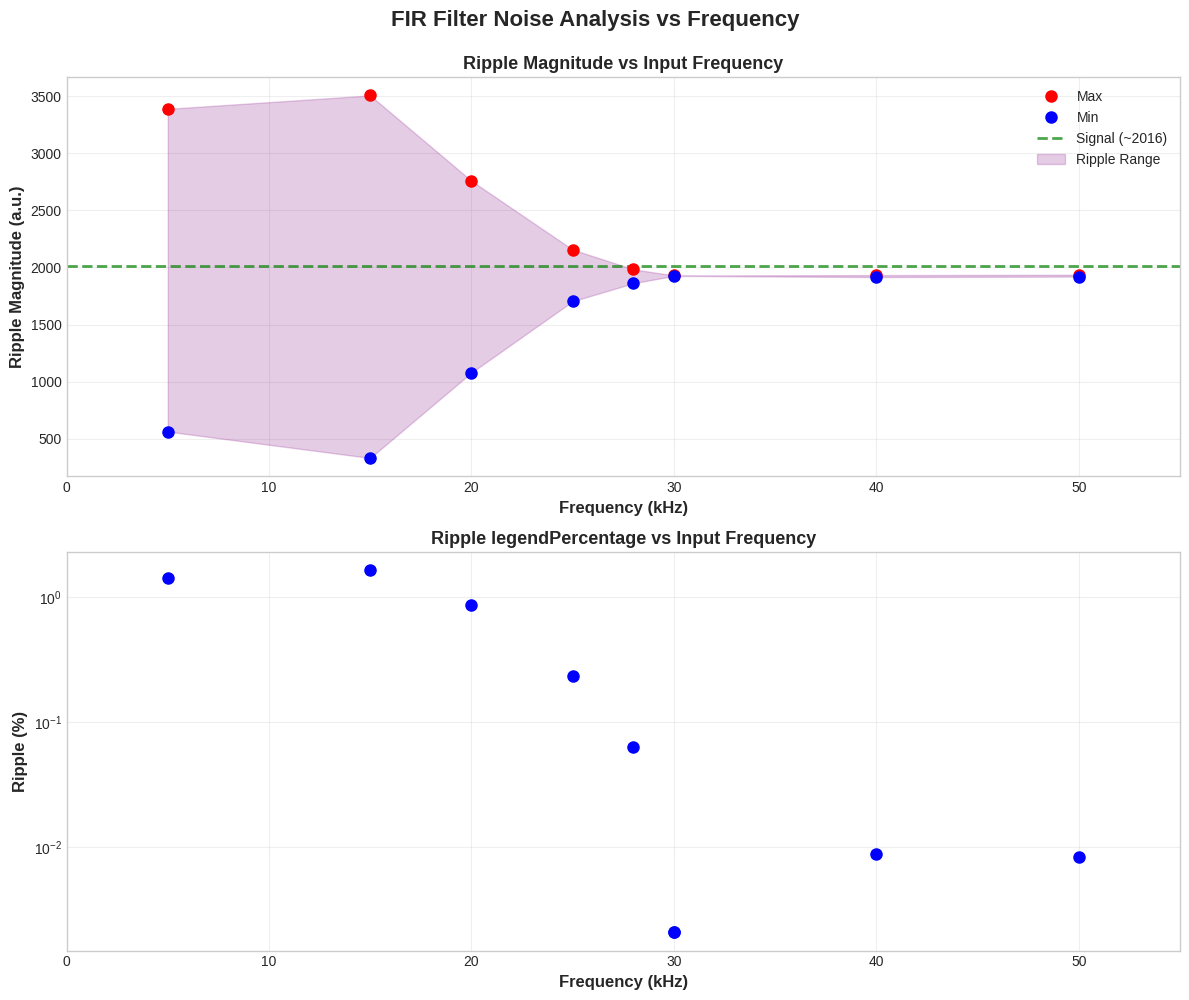

NOISE ANALYSIS - FREQUENCY DEPENDENCY
Frequency range tested: 5 - 50 kHz

Ripple Statistics:
  Best performance:  0.002075% at 30 kHz
  Worst performance: 1.652944% at 15 kHz
  Improvement factor: 796.7x

Ripple Range (Max - Min):
   5 kHz: 2824 (Min:  564, Max: 3388) = 1.4291%
  15 kHz: 3172 (Min:  333, Max: 3505) = 1.6529%
  20 kHz: 1678 (Min: 1080, Max: 2758) = 0.8744%
  25 kHz:  452 (Min: 1704, Max: 2156) = 0.2342%
  28 kHz:  122 (Min: 1862, Max: 1984) = 0.0634%
  30 kHz:    4 (Min: 1926, Max: 1930) = 0.0021%
  40 kHz:   17 (Min: 1916, Max: 1933) = 0.0088%
  50 kHz:   16 (Min: 1920, Max: 1936) = 0.0083%

Key Observation:
  • Ripple is minimized near 30 kHz (0.002075%)
  • This suggests the FIR filter is optimized for ~30 kHz
  • Performance degrades at both lower and higher frequencies


In [58]:
# Noise Analysis vs Frequency
import numpy as np
import matplotlib.pyplot as plt

# Parse the noise data (frequency in kHz vs ripple)
freq_data = """
5	564	3388	1.429149798
15	333	3505	1.652944242
20	1080	2758	0.8744137572
25	1704	2156	0.2341968912
28	1862	1984	0.0634425377
30	1926	1930	0.002074688797
40	1916	1933	0.008833463237
50	1920	1936	0.008298755187
"""

# Parse data
frequencies = []
ripple_min = []
ripple_max = []
ripple_pct = []

for line in freq_data.strip().split('\n'):
    parts = line.strip().split('\t')
    frequencies.append(int(parts[0]))
    ripple_min.append(int(parts[1]))
    ripple_max.append(int(parts[2]))
    ripple_pct.append(float(parts[3]))

frequencies = np.array(frequencies)
ripple_min = np.array(ripple_min)
ripple_max = np.array(ripple_max)
ripple_pct = np.array(ripple_pct)

# Reference signal (ideal filtered output - approximate center)
reference_signal = 2016  # Approximate center value where ripple is minimal

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Ripple Magnitude vs Frequency
ax1.plot(frequencies, ripple_max, 'ro', markersize=8, label='Max', zorder=3)
ax1.plot(frequencies, ripple_min, 'bo', markersize=8, label='Min', zorder=3)
ax1.axhline(y=reference_signal, color='green', linestyle='--', linewidth=2, alpha=0.7, 
            label=f'Signal (~{reference_signal})')

# Shade the ripple region
ax1.fill_between(frequencies, ripple_min, ripple_max, alpha=0.2, color='purple', 
                  label='Ripple Range')

ax1.set_xlabel('Frequency (kHz)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Ripple Magnitude (a.u.)', fontsize=12, fontweight='bold')
ax1.set_title('Ripple Magnitude vs Input Frequency', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10, loc='upper right')
ax1.grid(True, alpha=0.3)
ax1.set_xlim([0, 55])

# Plot 2: Ripple Percentage vs Frequency
ax2.plot(frequencies, ripple_pct, 'bo', markersize=8, label='Ripple %', zorder=3)

# Mark the minimum ripple point
min_idx = np.argmin(ripple_pct)
ax2.plot(frequencies[min_idx], ripple_pct[min_idx], 'bo', markersize=8, 
         label=f'Minimum: {ripple_pct[min_idx]:.4f}% at {frequencies[min_idx]} kHz', zorder=4)

ax2.set_xlabel('Frequency (kHz)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Ripple (%)', fontsize=12, fontweight='bold')
ax2.set_title('Ripple legendPercentage vs Input Frequency', fontsize=13, fontweight='bold')
# ax2.legend(fontsize=10, loc='upper right')
ax2.grid(True, alpha=0.3)
ax2.set_xlim([0, 55])
ax2.set_yscale('log')  # Log scale to see the dramatic improvement near 30 kHz

plt.suptitle('FIR Filter Noise Analysis vs Frequency', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("="*70)
print("NOISE ANALYSIS - FREQUENCY DEPENDENCY")
print("="*70)
print(f"Frequency range tested: {frequencies.min()} - {frequencies.max()} kHz")
print()
print("Ripple Statistics:")
print(f"  Best performance:  {ripple_pct.min():.6f}% at {frequencies[min_idx]} kHz")
print(f"  Worst performance: {ripple_pct.max():.6f}% at {frequencies[np.argmax(ripple_pct)]} kHz")
print(f"  Improvement factor: {ripple_pct.max() / ripple_pct.min():.1f}x")
print()
print("Ripple Range (Max - Min):")
for i in range(len(frequencies)):
    ripple_range = ripple_max[i] - ripple_min[i]
    print(f"  {frequencies[i]:2d} kHz: {ripple_range:4d} (Min: {ripple_min[i]:4d}, Max: {ripple_max[i]:4d}) = {ripple_pct[i]:.4f}%")
print()
print("Key Observation:")
print(f"  • Ripple is minimized near {frequencies[min_idx]} kHz ({ripple_pct[min_idx]:.6f}%)")
print(f"  • This suggests the FIR filter is optimized for ~{frequencies[min_idx]} kHz")
print(f"  • Performance degrades at both lower and higher frequencies")
print("="*70)